<a href="https://colab.research.google.com/github/MalakAlQahtani/Medical-Cost-Personal-Datasets/blob/main/Medical_Cost_Personal_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Formulate  the problem**

**Can medical insurance costs be predicted?**

The output will be number so it is regression



**Importing the needed libraries**

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


**Loading the medical cost personal dataset from Kaggle website** [link text](https://www.kaggle.com/mirichoi0218/insurance)

In [2]:
data = pd.read_csv('/content/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Data exploration**

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()
# 4 numeric features & 3 catogorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.shape
# 1338 instances & 7 features

(1338, 7)

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Finding missing data**

In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Data preprocessing**

In [8]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in the column itself
data['sex'] = labelencoder.fit_transform(data['sex'].astype(str))
data['smoker'] = labelencoder.fit_transform(data['smoker'].astype(str))
data['region'] = labelencoder.fit_transform(data['region'].astype(str))


data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


**EDA**

Text(0.5, 1.0, 'The correlation between features')

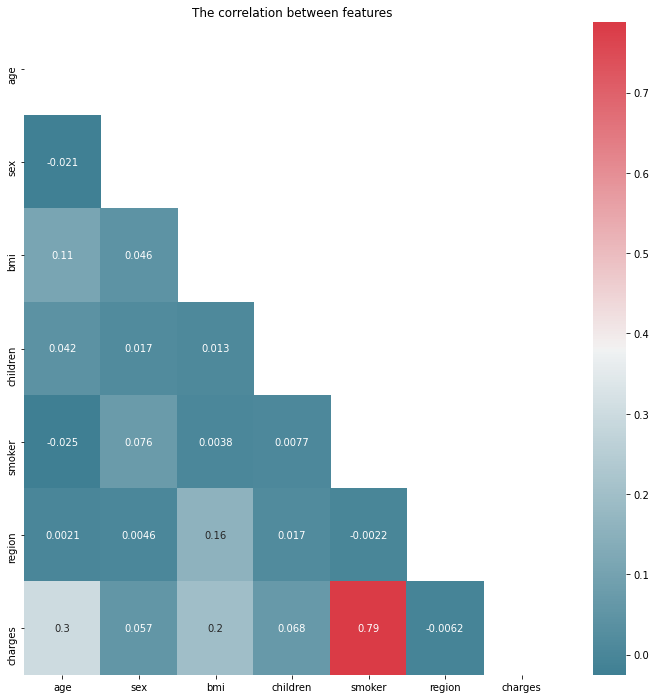

In [9]:
X = data

f, ax = plt.subplots(figsize=(12, 12))

matrix = np.triu(X.corr())
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(X.corr(), annot=True,cmap=cmap, mask=matrix)
plt.title("The correlation between features")

There is a strong corrolation between smoking patients and the cost of treatment

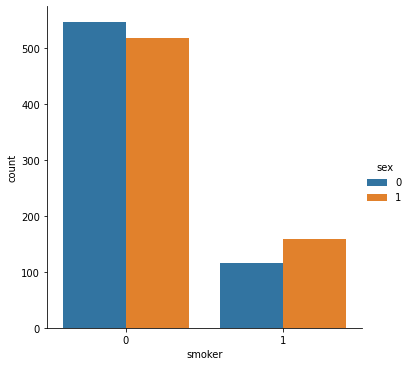

In [10]:
sns.catplot(x="smoker", kind="count",hue = 'sex',  data=data)
# 0 for female, 1 for male
# 0 non smokers, 1 for smokers

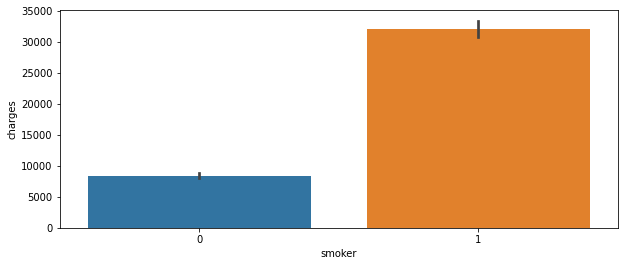

In [11]:
plt.figure(figsize=(10, 4))
sns.barplot(x="smoker", y="charges", data=data);
# 0 non smokers, 1 for smokers

**Feature engineering**

In [12]:
#Setting ages to categories 
bin_ranges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
bin_names = ["0-10", "11-20", '21-30', '31-40', '41-50', '51-60', '61-70', '71-80','81-90']
data['age_bin'] = pd.cut(np.array(data['age']), bins=bin_ranges, labels=bin_names, include_lowest = True)

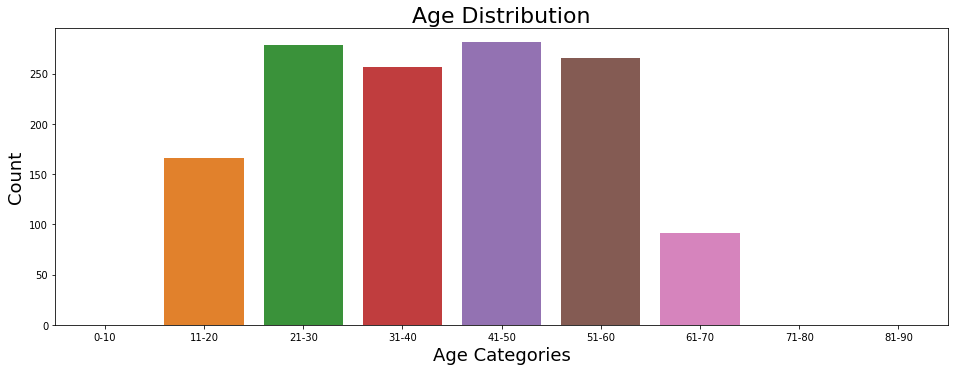

In [13]:
#Visualising categories and categories across target feature
show_prob_age = pd.crosstab(data['age_bin'], data['charges'], normalize='index')

plt.figure(figsize=(16,12))
plt.subplot(211)
ax1 = sns.countplot(x="age_bin", data=data)
ax1.set_title("Age Distribution", fontsize=22)
ax1.set_xlabel("Age Categories", fontsize=18)
ax1.set_ylabel("Count", fontsize=18)


plt.show()

In [14]:
data

,age,sex,bmi,children,smoker,region,charges,age_bin
0,19,0,27.900,0,1,3,16884.92400,11-20
1,18,1,33.770,1,0,2,1725.55230,11-20
2,28,1,33.000,3,0,2,4449.46200,21-30
3,33,1,22.705,0,0,1,21984.47061,31-40
4,32,1,28.880,0,0,1,3866.85520,31-40
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,41-50
1334,18,0,31.920,0,0,0,2205.98080,11-20
1335,18,0,36.850,0,0,2,1629.83350,11-20
1336,21,0,25.800,0,0,3,2007.94500,21-30


**Modeling**

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [16]:
x = data.drop(['charges','age_bin','region'], axis = 1)
y = data.charges

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30)
M = LinearRegression()
M.fit(x_train,y_train)

y_train_pred = M.predict(x_train)
y_test_pred = M.predict(x_test)




**Evalution of the Model**

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,y_train_pred),
mean_squared_error(y_test,y_test_pred)))
print('MAE train data: %.3f, MAE test data: %.3f' % (
mean_absolute_error(y_train,y_train_pred),
mean_absolute_error(y_test,y_test_pred)))


MSE train data: 34513033.550, MSE test data: 41904427.978
MAE train data: 4044.420, MAE test data: 4459.186


**Visualizing the Result**

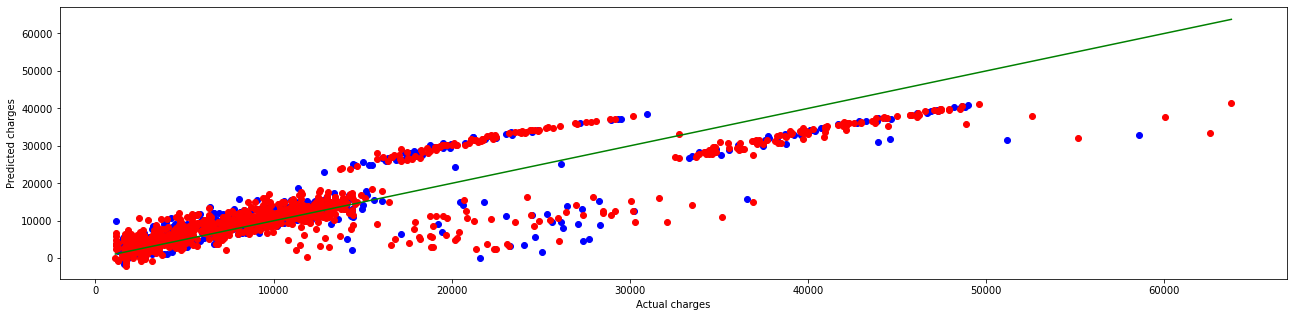

In [18]:
plt.figure(figsize=(22,5))
plt.scatter(y_test, y_test_pred,  color='blue')
plt.scatter(y_train, y_train_pred,  color='red')
plt.plot([data['charges'].min(), data['charges'].max()], [data['charges'].min(), data['charges'].max()], color='green')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.show()